# **Prediciton of type-II diabetes in patients using logisitc regression and SVM**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to predict whether a person has type2 diabetes or not.

**CONTENTS**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.





In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler


Reading the CSV file and storing in a pd dataframe 

In [0]:
data=pd.read_csv('diabetes.csv')

Extracting information and entry types

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset has 8 features and 768 entries. Since the main aim is to classify the data. It is best to implement logistic regression. The simple algorithm is sufficient to address the problem.

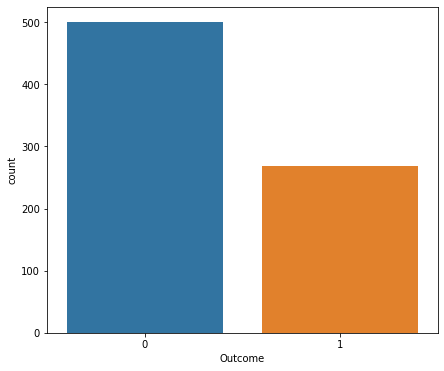

In [19]:
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Outcome", data=data)

**Preprocessing**

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


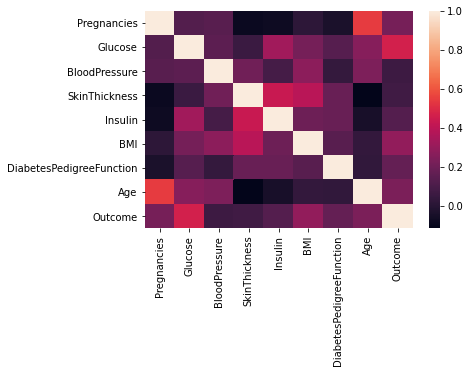

In [31]:
sns.heatmap(correlation)

In [58]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Glucose'] = scaler.fit_transform(data[['Glucose']])
data['BloodPressure'] = scaler.fit_transform(data[['BloodPressure']])
data['BMI'] = scaler.fit_transform(data[['BMI']])
data['SkinThickness'] = scaler.fit_transform(data[['SkinThickness']])
data['Pregnancies'] = scaler.fit_transform(data[['Pregnancies']])
data['Insulin']=scaler.fit_transform(data[['Insulin']])
data.head()
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1


Seperating input and output feature

In [0]:
# Feature and output vectors    
X=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=data[['Outcome']]

Model fitting

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Metrics

In [65]:
y_pred=lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7760416666666666
Precision: 0.7317073170731707
Recall: 0.4838709677419355


In [68]:
mat=metrics.confusion_matrix(y_test,y_pred)
mat

array([[119,  11],
       [ 32,  30]])

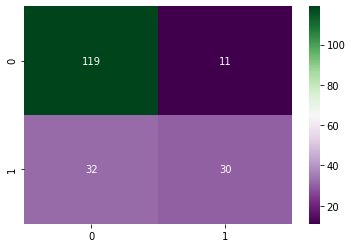

In [79]:

sns.heatmap(pd.DataFrame(mat), annot=True, cmap="PRGn" ,fmt='g')

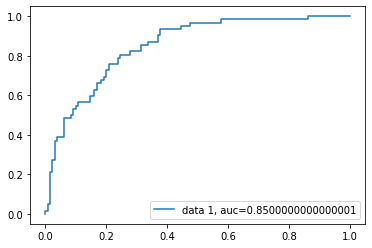

In [81]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [89]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
prediction=classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7760416666666666
Precision: 0.7317073170731707


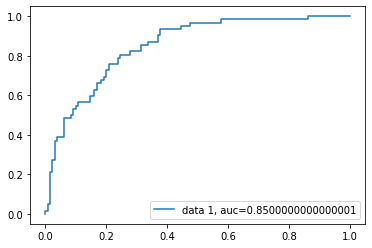

In [92]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()